# Classification problem

In the classification problem, the predicted value $y$ takes on discrete values. In this notebook, we cover the case of logistic regression for binary classification problem and then extended it to a multiclass scenario.

### Binary classification
In binary classification, the predicted value is identified as belonging to either positive ($y=1$) or negative ($y=0$) class. Our classification strategy from linear regression fails here because $y = x^T\beta \in R$. In logistic regression, rather than directly predicting the class, we want to output the probabilities of an object belonging to any of the classes, and then make a decision by applying a particular strategy (picking the class with the highest probability in binary classification, majority voting in multiclass problem, and some others) to these probabilities.

In binary classification problem, the probability of an object belonging to a negative class can be inferred from the probability of it belonging to a positive class, thus we only need to be able to output one of the probabilities from the model. 

Let's assume we are predicting probabilities for a positive class:

$$
p_{+} = P(y=1|x) \in [0,1]
$$

Transforming this into the logit function
$$
logit(p) = log \frac{p_{+}}{1-p_{+}} \in R
$$

we get a quantity that can be directly predicted by $x^T\beta$

Since we want to optimize the model based on the probabilities, we obtain the inversed form:

$$
p_{+} = \frac{1}{1+exp(-x^T\beta)}
$$

which is the definition of the Sigmoid function:

$$
\sigma_{\beta}(x) = \frac{1}{1+exp(-x^T\beta)}
$$

Thus, $p_{+} = \sigma_{\beta}(x)$ and $p_{-} = 1 - \sigma_{\beta}(x)$, which can be expressed more compactly as 
$$
p(y|x, \beta) = (\sigma_{\beta}(x))^{y}(1-\sigma_{\beta}(x))^{1-y}
$$

Just like we did in Linear regression, we want to find a parameter $\beta$ that maximizes the log-likelihood of the observed data. Assuming the objects are generated independently, we can first write down the likelihood as:

$$
L(\beta) = p(y|X;\beta) = \prod_{i=1}^{n}p(y^{(i)}|x^{(i)};\beta) = \prod_{i=1}^{n}(\sigma_{\beta}(x^{(i)}))^{y^{(i)}}(1 - \sigma_{\beta}(x^{(i)}))^{1 - y^{(i)}}
$$

and now turning it into log-likelihood:
$$
l(\beta) = log(L(\beta)) = \sum_{i=1}^{n}y^{(i)}log(\sigma_{\beta}(x^{(i)})) + (1 - y^{(i)})log(1 - \sigma_{\beta}(x^{(i)}))
$$

Using the fact that 

$$
\sigma^{\prime}(x) = \sigma(x)(1 - \sigma(x))
$$

we can derive partial derivatives with respect to each $\beta_{j}$:

$$
\frac{\partial L(\beta)}{\partial \beta_{j}} = \sum_{i=1}^{m} \left( y^{(i)} - \sigma_{\beta_{j}}(x^{(i)}) \right) x^{(i)}
$$

Then, combining the partial derivatives into the vectorized form:

$$
\nabla_{\beta} L(\beta) = X^T (y - \sigma_{\beta})
$$

Since the goal is to maximize the log-likelihood, we resort to the gradient ascent algorithm, whose update rule is expressed as follows:

$$
\beta^{t+1} = \beta^{t} + \frac{\alpha}{n} \nabla_{\beta^{t}} L(\beta^{t}) = \beta^{t} + \frac{\alpha}{n} X^T (y - \sigma_{\beta^{t}})
$$

Such model framing in the form of a binomial distribution where the probability of sucess is given by a transformation of a linear model of predictors turns out to be an informal description of generalized linear models (GLM) family. All generalized linear models have the following characteristics ([Rundel, 2013](https://www2.stat.duke.edu/courses/Spring13/sta102.001/Lec/Lec20.pdf)):

* A probability distribution describing the outcome variable 
* A linear model $\eta = \beta_{0} + \beta_{1}x_{1} + \cdots + \beta_{n}x_{n}$ 
* A link function that relates the linear model to the parameter of the outcome distribution $g(p) = \eta$ or $p = g^{-1}(\eta)$

Our logistic regression model satisfies these criteria:
* $y_{i} \sim Binom(p_{i}$)
* $\eta = x^T\beta = \beta_{0} + \beta_{1}x_{1} + \cdots + \beta_{n}x_{n}$
* $logit(p) = \eta$

### Multiclass classification
The binary classifier that we developed above can be repurposed for the multiclass ($K$ possible classes) scenario following one of the two strategies: One-vs-All (OvA) or One-vs-One(OvO).

#### One-vs-All
OvA classification involves training a binary classifier for each class against the rest of the dataset, resulting in the total of $K$ classifiers. Each classifier outputs a confidence score of the instance belonging to the target class, and the class with the highest confidence score is predicted.

This approach makes an assumption that each class is individually linearly separable from all the other classes. Moreover, since each classifier is trained separately on its own binary problem, the model parameters are learned based on potentially very different data distributions and class imbalances. Some classes may be inherently harder to distinguish from the others, and thus, a classifier facing a more ambiguous separation might output probabilities that cluster around the middle of the range, while a classifier for a very distinct class might output probabilities that are closer to the extremes.

#### One-vs-One
OvO classification, on the other hand, trains a binary classifier for every pair of classes (the total of $\frac{K(K-1)}{2}$ classifiers), and the class with the most pairwise classification wins is predicted.

In contrast to OvA, where the full training dataset is used to train each classifier, in One-vs-One approach, the set is subsampled to include the instances of the two target classes only for each classifier. Another difference is that, OvO classification makes an assumption that every pair of classes is linearly separable. Moreover, size of a training subset for a pair of labels could be small, leading to overfitting of the binary classifier. Finally, the huge number of classifiers requires large space to store model weights.



### Metrics used to assess classification models

Accuracy is the simplest metric that represent the ratio of the correctly classified samples to their total number. In general, accuracy is defined as:

$$
Accuracy = \frac{1}{n}\sum_{i=1}^{n}[y_{i}^{t} = y_{i}^{p}]
$$

where $n$ is the total number of samples and $y_{i}^{t}$ and $y_{i}^{p}$ are the true and predicted labels for sample{{ $i$, respectively.

We can also define a balanced accuracy averaged over the total number of classes (instead of samples), where for each class we find the ratio of the correctly classified samples:

$$
Balanced \ accuracy = \frac{1}{C}\sum_{k=1}^{C}\frac{\sum_{i}[y_{i}^{t} = k \ and \ y_{i}^{p} = y_{i}^{t}]}{\sum_{i}[y_{i}^{t} = k]}
$$

Performance metrics discussed next combine the following 4 simple metrics:
* True positives (TP) - the number of objects belonging to a positive class that were predicted as such
* True negatives (TN) - the number of objects belonging to a negative class that were predicted as such
* False positives (FP) - the number of objects belonging to a negative class that were predicted as belonging to a positive class
* False negatives (FN) - the number of objects belonging to a positive class that were predicted as belonging to a negative class

These 4 metrics can be combined into a single diagram called confusion matrix. Let's use the following dataset used to predict the presence (condition = 1) or absence (condition = 0) of a heart disease.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('condition', axis=1)
y = df.condition

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
from sklearn.linear_model import LogisticRegression

clsf = LogisticRegression(max_iter=1000)
clsf.fit(X_train, y_train)

y_pred = clsf.predict(X_test)

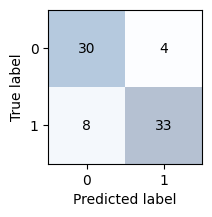

In [11]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.0, 2.0))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


True positive rate (TPR) and false positive rate (FPR) are performance metrics that are especially useful for imbalanced class problems. 

TPR provides a ratio of the correctly classified positive samples to the total number of positives: 
$$
TPR = \frac{TP}{P} = \frac{TP}{TP + FN}
$$

while FPR describes a proportion of negatives that were incorrectly classified as positives:
$$
FPR = \frac{FP}{N} = \frac{FP}{FP + TN}
$$

The two other metrics that specifically focus on true positives are Precision and Recall.

Precision captures the ratio of true positives to the number of samples that were classified as such:

$$
Precision = \frac{TP}{TP + FP}
$$

while Recall quantifies the amount of true positives out of all positives in the set, which, in fact, is the same as the true positive rate:

$$
Recall = \frac{TP}{TP + FN}
$$

Precision and Recall are usually optimized simultaneously by achieving some sort of a trade-off between them since maximizing only one of them is trivial:

* To maximize Recall, predict every object as positive, ensuring that the number of false negatives is 0.
* To maximize Precision, pick an object that has the highest confidence score and report it as positive, while classifying everything else as negative. The object with the highest confidence will most likely be of a positive class, giving us $TP = 1$, and setting everything else as negative will result in $FP = 0$

A metrics that characterizes the trade-off between them is called $F_{1}$ score and is defined as the harmonic mean between Precision and Recall:

$$
F_{1} = 2\frac{Precision \times Recall}{Precision + Recall}
$$

The next performance metric is the area under the Receiver operating characteristic (ROC) graph. ROC graphs are useful tools to select models for classification based on their performance with respect to the FPR and TPR, which are computed by shifting the
decision threshold of the classifier. The diagonal of a ROC graph can be interpreted as random guessing, and classification models that fall below the diagonal are considered as worse than random guessing ([Raschka, 2022](https://amzn.eu/d/8yQ55gm)).

When the classifier is random, it doesn’t distinguish between positive and negative classes. The probability of a sample (regardless of its true label) receiving a score above any threshold is the same for both classes. In other words, for any chosen threshold, the fraction of the positive class that scores above the threshold (TPR) and the fraction of the negative class that scores above the threshold (FPR) will be the same, thus a straight line.

The ideal—or perfect—ROC curve is characterized by a vertical segment from (0,0) to (0,1) followed by a horizontal segment from (0,1) to (1,1). A perfect model assigns higher confidence scores ($t$) to every positive instance than to any negative instance. This means there exists a threshold $\tilde{t}$ such that:

* All positives have confidence scores $t > \tilde{t}$
* All negatives have confidence scores $t < \tilde{t}$

When the threshold is maximum (1), no samples are predicted positive, so both TPR and FPR are 0. As we lower the threshold toward $\tilde{t}$, we start capturing positive instances. Because no negative instance ever has a score above $\tilde{t}$, the FPR remains at 0 while the TPR increases gradually from 0 to 1. This process creates a vertical line at FPR = 0, with TPR moving from 0 to 1.

Once the threshold drops below $\tilde{t}$, every positive is already captured (TPR remains 1). However, further decreasing the threshold begins to include negative instances, so the FPR increases from 0 to 1, which creates a horizontal line at TPR = 1.

From this discussion, we deduce that the area under the ROC curve (ROC-AUC) represents the probability that the model, if given a randomly chosen positive and negative example, will rank the positive higher than the negative. The perfect model above, containing a square with sides of length 1, has an area under the curve (AUC) of 1.0. This means there is a 100% probability that the model will correctly rank a randomly chosen positive example higher than a randomly chosen negative example ([Google ML Crash Course, 2024](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)).

Continuing with the example of a heart disease, let's construct the ROC curve:

In [14]:
def get_TP_FP_rates(y_pred, y_true):
    y_pred = pd.Series(y_pred, index=y_true.index)

    TP, FN, FP, TN = 0, 0, 0, 0

    for idx in y_true.index:
        if y_true[idx] == 1 and y_pred[idx] == 1:
            TP += 1
        elif y_true[idx] == 1 and y_pred[idx] == 0:
            FN += 1
        elif y_true[idx] == 0 and y_pred[idx] == 0:
            TN += 1
        elif y_true[idx] == 0 and y_pred[idx] == 1:
            FP += 1

    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    return tpr, fpr

get_TP_FP_rates(y_pred, y_test) 

(0.8048780487804879, 0.11764705882352941)

In [18]:
# For the sake of using the knowledge about regularization from the previous tutorial,
# we will compare ROC curves for non-regularized and L2-regularized regressors

norm_lr = LogisticRegression(max_iter=1200, penalty=None)
l2_lr = LogisticRegression(max_iter=1200, penalty='l2')

norm_lr.fit(X_train, y_train)
l2_lr.fit(X_train, y_train)

norm_lr_probs = norm_lr.predict_proba(X_test)[:, 1]
l2_lr_probs = l2_lr.predict_proba(X_test)[:, 1]

norm_lr_tpr = []
norm_lr_fpr = []
l2_lr_tpr = []
l2_lr_fpr = []

prob_threshs = np.linspace(0, 1, num=100)

for thresh in prob_threshs:
    norm_lr_pred = []
    l2_lr_pred = []

    for idx in range(len(norm_lr_probs)):
        if norm_lr_probs[idx] > thresh:
            norm_lr_pred.append(1)
        else:
            norm_lr_pred.append(0)
        
        if l2_lr_probs[idx] > thresh:
            l2_lr_pred.append(1)
        else:
            l2_lr_pred.append(0)

    norm_tpr, norm_fpr = get_TP_FP_rates(norm_lr_pred, y_test)
    l2_tpr, l2_fpr = get_TP_FP_rates(l2_lr_pred, y_test)

    norm_lr_tpr.append(norm_tpr)
    norm_lr_fpr.append(norm_fpr)
    l2_lr_tpr.append(l2_tpr)
    l2_lr_fpr.append(l2_fpr)

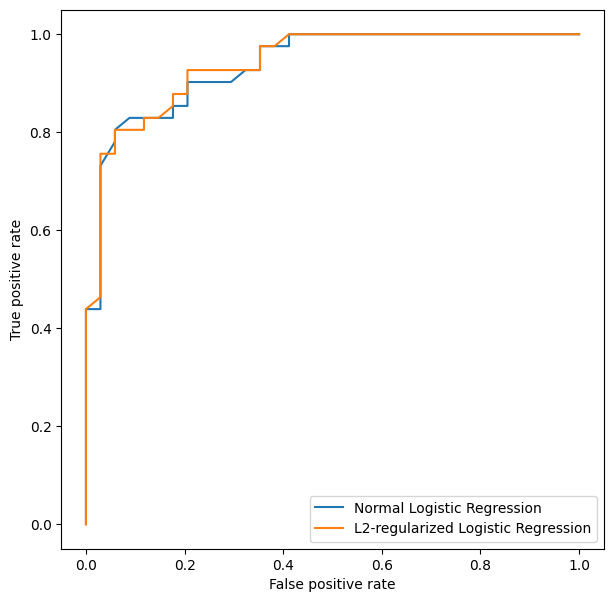

In [19]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(norm_lr_fpr, norm_lr_tpr, label='Normal Logistic Regression')
ax.plot(l2_lr_fpr, l2_lr_tpr, label="L2-regularized Logistic Regression")
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.legend()

In [17]:
from sklearn.metrics import auc
print(f"ROC AUC for Normal Logistic Regression model is {auc(norm_lr_fpr, norm_lr_tpr)}\n")
print(f"ROC AUC for L2-regularized Logistic Regression model is {auc(l2_lr_fpr, l2_lr_tpr)}\n")

ROC AUC for Normal Logistic Regression model is 0.9368723098995696

ROC AUC for L2-regularized Logistic Regression model is 0.9401004304160689



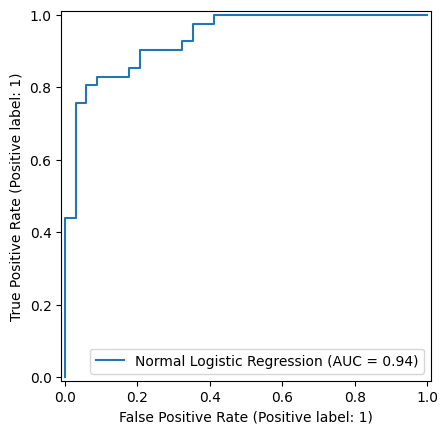

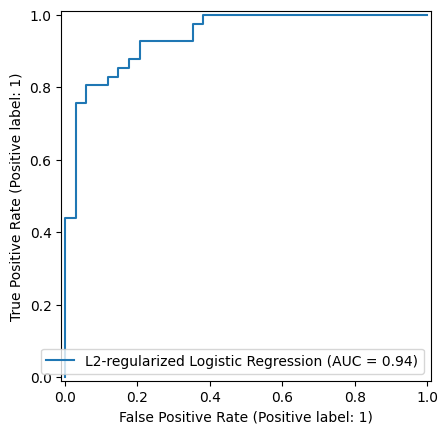

In [20]:
# We can also simply use existing classes

from sklearn.metrics import RocCurveDisplay

norm_roc = RocCurveDisplay.from_estimator(norm_lr, X_test, y_test, name='Normal Logistic Regression')
l2_roc = RocCurveDisplay.from_estimator(l2_lr, X_test, y_test, name='L2-regularized Logistic Regression')